### **Problem Description**

In this project, you will be solving a problem where micro robots are tasked with navigating within a wooden box environment which has obstacles. Your objective is to predict the trajectory of the robot over a specified duration based on historical video data.

### **Time Series and Lookback**

The data we have is $\color{orange}{\text{time-series}}$. You will come across this data type very often in this field, since it forms the basis for many AI-based tasks. Let us learn some concepts regarding that. <br/>
A time series dataset is a collection of data points (or observations) recorded at successive, equally spaced intervals of time, with the intention of analyzing patterns/trend, and behavior of a feature over time.
For example, if we have a feature's values across a 10 timestep window i.e., `[t-10, t-9, t-8, ... t-1]` we can predict its value at time step `t` based on aggregated information from the previous timesteps. </br>


### **Dataset Overview**

We have the following format for train and test data in this project:

* Training Data
  - A 1200-second video recording `(training_data.mp4)` of the robot's movement within the wooden box environment. This video is captured at 30 frames per second (fps).
  - A text file  `(training_data.txt)`containing the robot's coordinates, with 30 values recorded for each second (since video is 30 fps).

* Testing Data
  - A test video `(test01.mp4)`, 60 seconds long recorded at 30 fps.
  - A test txt file `(test01.txt)` following the same format as the `training_data.txt` file.

### **Objective**

Our goal is to forecast the positions of the robot using KNN, Regression Tree (decision trees that can take continuous values instead of class labels), and Neural Networks.

# **KNN from Scratch**


In [139]:
import numpy as np
import collections as Counter
import matplotlib.pyplot as plt

### Loading and Preprocessing the Dataset

Get the training and testing data `(trainX and testX)` (you may use the function below to preprocess it). Further, think about how you would form the predictions array `(trainY and testY)` using a lookback of 1.

In [140]:
def process_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    data = []
    for line in lines:          
        x_str, y_str = line.strip().split(',')
        x = int(x_str)
        y = int(y_str)
        data.append([x, y])   
    data = np.array(data)
    return data

In [141]:

data_train = process_data('training_data.txt')
test_data = process_data('test01.txt')

small_data = data_train 
small_data_test = test_data 

lookback = 1


testX = small_data_test[:-lookback]
testY = small_data_test[lookback:]

trainX = small_data[:-lookback] 
trainY = small_data[lookback:]  



In [142]:

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def predict_next_position(new_point, X_train, y_train, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(new_point, X_train[i])
        distances.append((dist, i))  
        
    distances.sort()  
    neighbors_indices = [index for (_, index) in distances[:k]]
    neighbor_positions = y_train[neighbors_indices]

    prediction = np.mean(neighbor_positions, axis=0)
    return prediction

### Evaluation and Analysis

In [143]:
predictions = []
k_values = [2, 4 , 6 , 8 , 10]

for j in range(0,5):
    prediction = []

    for i in testX:
        new_point = np.array(i)  
        predicted_position = predict_next_position(new_point, trainX, trainY, k_values[j])
        prediction.append(predicted_position)

    prediction = [list(arr) for arr in prediction]
    predictions.append(prediction)

print("k = 2", predictions[0])
print("k = 4", predictions[1])



k = 2 [[446.5, 114.0], [458.0, 109.0], [462.5, 101.5], [468.0, 95.0], [466.0, 72.0], [470.5, 65.5], [483.5, 61.0], [485.0, 53.5], [476.0, 57.0], [493.5, 71.0], [490.5, 67.0], [499.0, 59.5], [497.5, 58.5], [506.5, 59.0], [515.0, 55.0], [521.5, 57.0], [531.5, 57.0], [535.5, 60.0], [536.0, 66.0], [536.0, 66.0], [535.5, 58.0], [535.5, 70.5], [533.0, 75.0], [534.5, 66.0], [536.5, 72.5], [533.0, 80.0], [536.0, 91.0], [529.5, 101.5], [524.5, 104.0], [525.0, 110.5], [518.5, 110.5], [506.5, 121.5], [507.5, 127.5], [512.0, 135.0], [498.0, 141.0], [495.5, 136.5], [481.0, 140.0], [476.0, 143.5], [473.5, 154.0], [456.5, 147.0], [462.0, 144.0], [457.5, 142.0], [449.0, 142.5], [429.0, 134.5], [428.5, 146.0], [418.5, 128.5], [412.0, 135.0], [405.0, 126.5], [401.0, 123.0], [395.5, 120.5], [388.5, 118.5], [372.5, 115.5], [373.5, 106.5], [361.5, 114.0], [357.5, 96.0], [354.0, 99.5], [352.0, 100.0], [332.5, 101.0], [331.0, 92.0], [316.0, 88.5], [317.5, 90.5], [306.5, 85.0], [290.5, 91.0], [286.5, 79.5], [

In [144]:
def calculate_rmse(actual_data, predicted_data):

    actual_data = np.array(actual_data)
    predicted_data = np.array(predicted_data)
    
    actual_x = actual_data[:, 0] 
    actual_y = actual_data[:, 1]  
    
    predicted_x = predicted_data[:, 0]  
    predicted_y = predicted_data[:, 1]  
    
    squared_diff_x = np.square(actual_x - predicted_x)
    squared_diff_y = np.square(actual_y - predicted_y)
    
    mean_squared_diff_x = np.mean(squared_diff_x)
    mean_squared_diff_y = np.mean(squared_diff_y)
    
    rmse_x = np.sqrt(mean_squared_diff_x)
    rmse_y = np.sqrt(mean_squared_diff_y)
    
    return rmse_x + rmse_y

R_Error = []

for i in range(0, len(predictions)):
    error = calculate_rmse(testY, predictions[i])
    R_Error.append(error)

min_index = R_Error.index(min(R_Error))

print(R_Error)
print("min error: " , R_Error[min_index], "in k =", k_values[min_index])

[14.013819619837296, 13.082813662718117, 12.702017738886543, 12.516389104052536, 12.388212847326074]
min error:  12.388212847326074 in k = 10


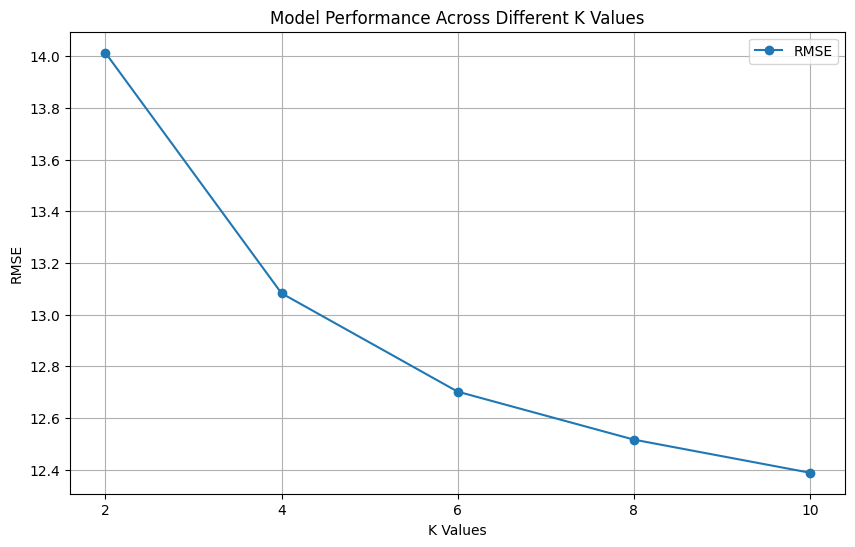

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, R_Error, marker='o', label='RMSE')
plt.xlabel('K Values')
plt.ylabel('RMSE')
plt.title('Model Performance Across Different K Values')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

## Plotting the Paths

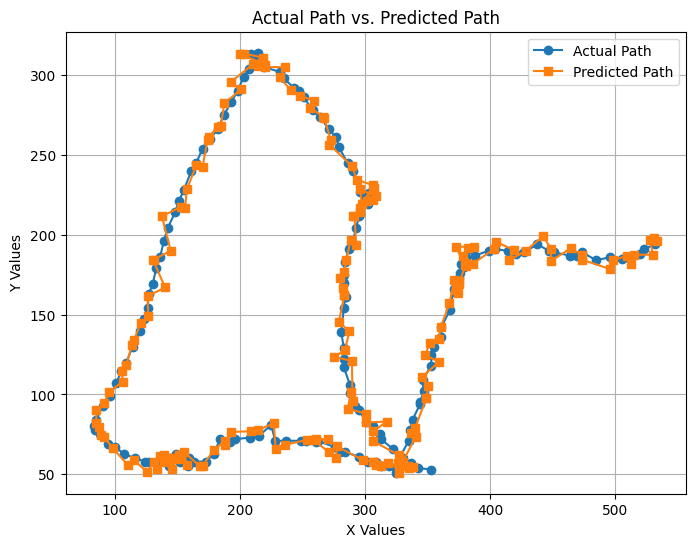

In [25]:
test_data_6 = process_data('test01.txt')

seconds_6_interval_test = test_data_6[200: 380]

testX_180 = seconds_6_interval_test[:-lookback]
testY_180 = seconds_6_interval_test[lookback:]

prediction_180 = []

for i in testX_180:
    new_point = np.array(i)  
    predicted_position = predict_next_position(new_point, trainX, trainY, k_values[min_index])
    prediction_180.append(predicted_position)

prediction_180 = [list(arr) for arr in prediction_180]

actual_x = [point[0] for point in testY_180]
actual_y = [point[1] for point in testY_180]

predicted_x = [point[0] for point in prediction_180]
predicted_y = [point[1] for point in prediction_180]

plt.figure(figsize=(8, 6))
plt.plot(actual_x, actual_y, marker='o', label='Actual Path')
plt.plot(predicted_x, predicted_y, marker='s', label='Predicted Path')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Actual Path vs. Predicted Path')
plt.legend()
plt.grid(True)
plt.show()

# KNN using scikit-learn
To compare with state-of-the-art implmentaion.

In [26]:
import numpy as np
import collections as Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


def process_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    data = []
    for line in lines:         
        x_str, y_str = line.strip().split(',')
        x = int(x_str)
        y = int(y_str)
        data.append([x, y])    
    data = np.array(data)
    return data


data_train_B = process_data('training_data.txt')
test_data_B = process_data('test01.txt')

small_data_B = data_train_B
small_data_test_B = test_data_B[200: 380]

lookback = 1

testX = small_data_test_B[:-lookback]
testY = small_data_test_B[lookback:]

trainX = small_data_B[:-lookback]  
trainY = small_data_B[lookback:] 

## Plotting the paths

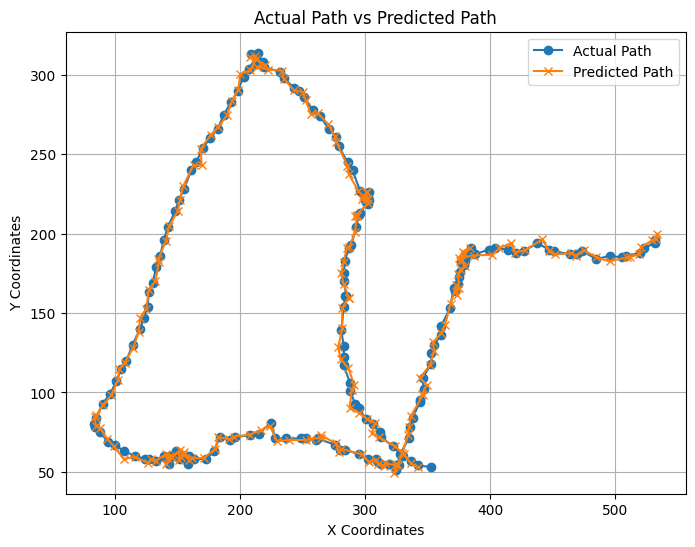

In [27]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

knn_regressor_x = KNeighborsRegressor(n_neighbors=10)
knn_regressor_y = KNeighborsRegressor(n_neighbors=10)

knn_regressor_x.fit(trainX, trainY[:, 0])
knn_regressor_y.fit(trainX, trainY[:, 1])  

predicted_x = knn_regressor_x.predict(testX)
predicted_y = knn_regressor_y.predict(testX)

predicted_coordinates = np.column_stack((predicted_x, predicted_y))

plt.figure(figsize=(8, 6))
plt.plot(testY[:, 0], testY[:, 1], label='Actual Path', marker='o')
plt.plot(predicted_coordinates[:, 0], predicted_coordinates[:, 1], label='Predicted Path', marker='x')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Actual Path vs Predicted Path')
plt.legend()
plt.grid(True)
plt.show()



Both the out implementation and the Scikit performance is comparable, the only difference being that the state-of-the-art is faster in training and inference. We did not optimize for training performance.